In [1]:
import pandas as pd
df=pd.read_csv(r'F:\Desktop\diabetes.csv')
df.shape

(768, 9)

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df=pd.DataFrame(df)

In [4]:
df['Outcome'].unique()

array([1, 0], dtype=int64)

1-have Diabetes
0-no diabetes

In [5]:
X=df[df.columns[:8]]
y=df['Outcome']

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [7]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [8]:
model.feature_importances_

array([0.10008895, 0.28825828, 0.09201431, 0.06399816, 0.06769711,
       0.13777404, 0.10880099, 0.14136817])

<AxesSubplot:>

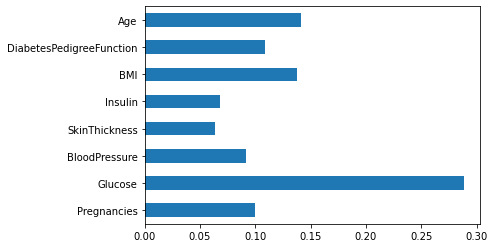

In [9]:
f_impo=pd.Series(model.feature_importances_,index=X.columns)
f_impo.plot(kind='barh')

In [10]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [11]:
y_pred=rfc.predict(X_test)

In [12]:
rfc.score(X_test,y_test)

0.78125

In [13]:
rfc.score(X_train,y_train)

1.0

In [15]:
import numpy as np
np.mean(y_pred==y_test)

0.78125

In [16]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [17]:
lr.fit(X_train,y_train)

D:\ProgramData\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
lr.score(X_test,y_test)

0.7916666666666666

In [19]:
lr.score(X_train,y_train)

0.7708333333333334

In [20]:
y_pred1=lr.predict(X_test)

In [21]:
np.mean(y_pred==y_test)

0.78125

In [22]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier()

In [23]:
pac.fit(X_train,y_train)

PassiveAggressiveClassifier()

In [24]:
pac.score(X_train,y_train)

0.6388888888888888

In [25]:
pac.score(X_test,y_test)

0.6822916666666666

In [26]:
y_pred2=pac.predict(X_test)
np.mean(y_pred2==y_test)

0.6822916666666666

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [29]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [30]:
knn.score(X_train,y_train)

0.7864583333333334

In [31]:
knn.score(X_test,y_test)

0.7552083333333334

In [32]:
y_pred3=knn.predict(X_test)

In [33]:
np.mean(y_pred3==y_test)

0.7552083333333334

In [37]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()

In [38]:
gb.fit(X_train,y_train)

GaussianNB()

In [39]:
gb.score(X_train,y_train)

0.765625

In [40]:
gb.score(X_test,y_test)

0.765625

In [42]:
y_pred4=gb.predict(X_test)
np.mean(y_pred4==y_test)

0.765625

In [43]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()

In [44]:
dc.fit(X_train,y_train)

DecisionTreeClassifier()

In [45]:
dc.score(X_train,y_train)

1.0

In [46]:
dc.score(X_test,y_test)

0.734375

In [47]:
y_pred5=dc.predict(X_test)
np.mean(y_pred5==y_test)

0.734375

In [80]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 20000, num = 50)]
print(n_estimators)

[100, 506, 912, 1318, 1724, 2130, 2536, 2942, 3348, 3755, 4161, 4567, 4973, 5379, 5785, 6191, 6597, 7004, 7410, 7816, 8222, 8628, 9034, 9440, 9846, 10253, 10659, 11065, 11471, 11877, 12283, 12689, 13095, 13502, 13908, 14314, 14720, 15126, 15532, 15938, 16344, 16751, 17157, 17563, 17969, 18375, 18781, 19187, 19593, 20000]


In [81]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 20000, num = 50)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 80, num = 6)]
min_samples_split = [2, 5, 10, 15, 100,250,500]
min_samples_leaf = [1, 2, 5, 10,20,40,80,160,320]

In [82]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 506, 912, 1318, 1724, 2130, 2536, 2942, 3348, 3755, 4161, 4567, 4973, 5379, 5785, 6191, 6597, 7004, 7410, 7816, 8222, 8628, 9034, 9440, 9846, 10253, 10659, 11065, 11471, 11877, 12283, 12689, 13095, 13502, 13908, 14314, 14720, 15126, 15532, 15938, 16344, 16751, 17157, 17563, 17969, 18375, 18781, 19187, 19593, 20000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 20, 35, 50, 65, 80], 'min_samples_split': [2, 5, 10, 15, 100, 250, 500], 'min_samples_leaf': [1, 2, 5, 10, 20, 40, 80, 160, 320]}


In [83]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [84]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=18375, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=35 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=18375, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=35, total=  26.1s
[CV] n_estimators=18375, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=35 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   26.0s remaining:    0.0s


[CV]  n_estimators=18375, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=35, total=  25.2s
[CV] n_estimators=18375, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=35 
[CV]  n_estimators=18375, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=35, total=  26.6s
[CV] n_estimators=18375, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=35 
[CV]  n_estimators=18375, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=35, total=  25.5s
[CV] n_estimators=18375, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=35 
[CV]  n_estimators=18375, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=35, total=  25.8s
[CV] n_estimators=4161, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=4161, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=5, total=   4.9s
[CV] n_estimators=4161, min_samples_

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  9.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 20, 35, 50, 65, 80],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10, 20,
                                                             40, 80, 160, 320],
                                        'min_samples_split': [2, 5, 10, 15, 100,
                                                              250, 500],
                                        'n_estimators': [100, 506, 912, 1318,
                                                         1724, 2130, 2536, 2942,
                                                         3348, 3755, 4161, 4567,
                                                         4973, 5379, 5785, 6191,
                                                         6597, 7004, 7410, 7816,
                                                         8222, 

In [85]:
y_predl=rf_random.predict(X_test)

In [86]:
np.mean(y_predl==y_test)

0.796875

In [90]:
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,y_predl)

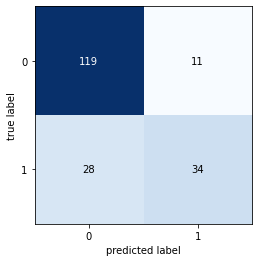

In [91]:
from mlxtend.plotting import plot_confusion_matrix
fig,ax=plot_confusion_matrix(conf_mat=conf_mat)

<AxesSubplot:>

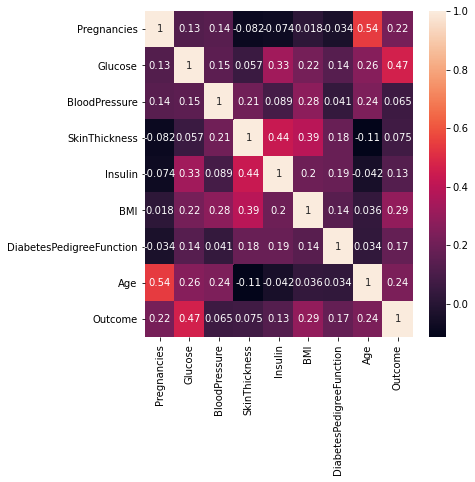

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True)
